# Análisis de la Varianza
## ANOVA de una vía 

Importemos las librerias y modulos necesarios para poder realizar las diferentes operaciones del notebook.

In [52]:
# External imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

Generemos de forma controlado y sintetica las muestras que vamos a estudiar y para las cuales vamos a realizar el análisis de varianza o ANOVA.

In [53]:
np.random.seed(2020)
voters_race = np.random.choice(
    a = ["asiatico","blanco","negro","hispano","otros"],
    p = [0.05,0.50,0.20,0.10,0.15],
    size = 1000
)
voters_age = stats.poisson.rvs(loc=18, mu=25, size=1000)

voters = pd.DataFrame({"race":voters_race, "age":voters_age})
treatments = voters.groupby("race").groups

In [54]:
asiatico = voters_age[treatments["asiatico"]]
blanco = voters_age[treatments["blanco"]]
negro = voters_age[treatments["negro"]]
hispano = voters_age[treatments["hispano"]]
otros = voters_age[treatments["otros"]]

Planteemos el constraste a realizar, en este caso queremos hacer un contraste teniendo como hipotesis nule que todas las medias poblaciones de las diferentes poblaciones son iguales entre si y como hipotesis alternativa que al menos una comparación entre medias es diferente.

La definición del contraste a realizar es la siguiente:

$$
\left\{
\begin{array}{ll}
H_0: & \mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5\\
H_1: & ∃\ i, j : mu_i \neq \mu_j 
\end{array}
\right.
$$

In [55]:
# Use the <f_oneway> function in order to calculate the result of the ANOVA analysis.
stats.f_oneway(asiatico, blanco, negro, hispano, otros)

F_onewayResult(statistic=0.34125500004740417, pvalue=0.8501763879300095)

El valor p para este contraste se puede realizar usando la siguiente formula:

$$p = P\left(F_{k-1, N-k}\geq\frac{MS_{Tr}}{MS_{E}}\right)$$

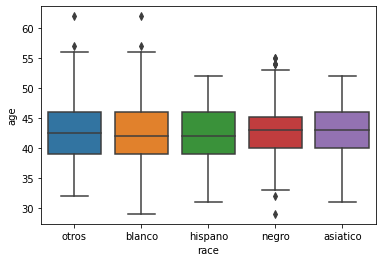

In [56]:
# Let's analize the behavior of the populations graphically.
import seaborn as sns
sns.boxplot(x=voters["race"], y=voters["age"]);

## ANOVA de una vía con comparación por pares

Generemos de forma controlado y sintetica las muestras que vamos a estudiar y para las cuales vamos a realizar el análisis de varianza o ANOVA.

In [57]:
np.random.seed(2020)
voters_race = np.random.choice(
    a = ["asiatico","blanco","negro","hispano","otros"],
    p = [0.05,0.50,0.20,0.10,0.15],
    size = 1000
)
white_ages = stats.poisson.rvs(loc=18, mu=33, size=1000)
voters_age = stats.poisson.rvs(loc=18,mu=28,size=1000)
voters_age = np.where(voters_race == "blanco", white_ages, voters_age)

In [58]:
voters = pd.DataFrame({"race":voters_race, "age":voters_age})
treatments = voters.groupby("race").groups

In [59]:
asiatico = voters_age[treatments["asiatico"]]
blanco = voters_age[treatments["blanco"]]
negro = voters_age[treatments["negro"]]
hispano = voters_age[treatments["hispano"]]
otros = voters_age[treatments["otros"]]

In [60]:
# Use the <f_oneway> function in order to calculate the result of the ANOVA analysis.
stats.f_oneway(asiatico, blanco, negro, hispano, otros)

F_onewayResult(statistic=45.463354140190084, pvalue=4.2073377186036713e-35)

Encontremos el o los contrastes que no estan dejando al ANOVA aceptar la hipotesis nula.

In [61]:
races = ["asiatico","blanco","negro","hispano","otros"]
race_pairs = []
for race1 in range(4):
  for race2 in range(race1+1,5):
    race_pairs.append((races[race1], races[race2]))
race_pairs

[('asiatico', 'blanco'),
 ('asiatico', 'negro'),
 ('asiatico', 'hispano'),
 ('asiatico', 'otros'),
 ('blanco', 'negro'),
 ('blanco', 'hispano'),
 ('blanco', 'otros'),
 ('negro', 'hispano'),
 ('negro', 'otros'),
 ('hispano', 'otros')]

In [62]:
for race1, race2 in race_pairs:
  print("**** Comparación de las poblaciones {p1} y {p2}".format(p1=race1, p2=race2))
  tt = stats.ttest_ind(voters_age[treatments[race1]], voters_age[treatments[race2]], equal_var=True)
  print(tt)

**** Comparación de las poblaciones asiatico y blanco
Ttest_indResult(statistic=-6.008581613895844, pvalue=3.3932200462588246e-09)
**** Comparación de las poblaciones asiatico y negro
Ttest_indResult(statistic=-0.9365601540525899, pvalue=0.34987098538665595)
**** Comparación de las poblaciones asiatico y hispano
Ttest_indResult(statistic=0.1726228075986723, pvalue=0.8631990207756343)
**** Comparación de las poblaciones asiatico y otros
Ttest_indResult(statistic=-0.7202832776251177, pvalue=0.4722311475285279)
**** Comparación de las poblaciones blanco y negro
Ttest_indResult(statistic=9.574582080618521, pvalue=1.6424565561685662e-20)
**** Comparación de las poblaciones blanco y hispano
Ttest_indResult(statistic=8.259362185083596, pvalue=9.461185767908647e-16)
**** Comparación de las poblaciones blanco y otros
Ttest_indResult(statistic=8.199665103361262, pvalue=1.2916440498166313e-15)
**** Comparación de las poblaciones negro y hispano
Ttest_indResult(statistic=1.4348772049977305, pvalue

In [63]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(
    endog=voters_age,
    groups=voters_race,
    alpha=0.05
)

In [64]:
tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
asiatico,blanco,5.2112,0.001,2.9319,7.4904,True
asiatico,hispano,-0.1473,0.9,-2.8418,2.5472,False
asiatico,negro,0.7505,0.9,-1.6689,3.1698,False
asiatico,otros,0.6682,0.9,-1.8516,3.188,False
blanco,hispano,-5.3585,0.001,-7.085,-3.6319,True
blanco,negro,-4.4607,0.001,-5.7152,-3.2061,True
blanco,otros,-4.5429,0.001,-5.9816,-3.1042,True
hispano,negro,0.8978,0.6756,-1.0099,2.8054,False
hispano,otros,0.8155,0.7834,-1.218,2.849,False
negro,otros,-0.0823,0.9,-1.7339,1.5694,False


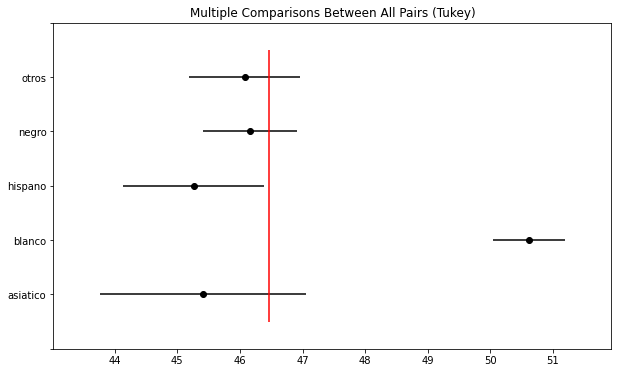

In [65]:
tukey.plot_simultaneous()
plt.vlines(x=46.46, ymin=-0.5, ymax=4.5, color="red");

## Normalidad de todas las subpoblaciones

- La población i-ésima es Normal

In [66]:
from statsmodels.stats.diagnostic import lilliefors
print(f"asiatico: {lilliefors(x=asiatico, dist='norm')}")
print(f"blanco: {lilliefors(x=blanco, dist='norm')}")
print(f"negro: {lilliefors(x=negro, dist='norm')}")
print(f"hispano: {lilliefors(x=hispano, dist='norm')}")
print(f"otros: {lilliefors(x=otros, dist='norm')}")

asiatico: (0.10687211099450733, 0.2)
blanco: (0.05209949537699465, 0.0022334262753635242)
negro: (0.070138244256575, 0.014615275783783289)
hispano: (0.10473875438620123, 0.01442529486020124)
otros: (0.07319733042103849, 0.05668875874657659)


## Homocedasticidad

- La igualdad de varianzas $\sigma_i^2$ son iguales para todo $i$.

In [67]:
from scipy.stats import bartlett
bartlett(asiatico, blanco, negro, hispano, otros)

BartlettResult(statistic=12.098024001177128, pvalue=0.016637026834818578)